In [ ]:
# import matplotlib.cm as cm
# from mpl_toolkits.basemap import Basemap as Basemap
# import matplotlib.colors as mcolors
# import plotly.graph_objects as go
# import plotly.express as px

### Solar, wind, and other capacities in 100% CES + BAU scenario

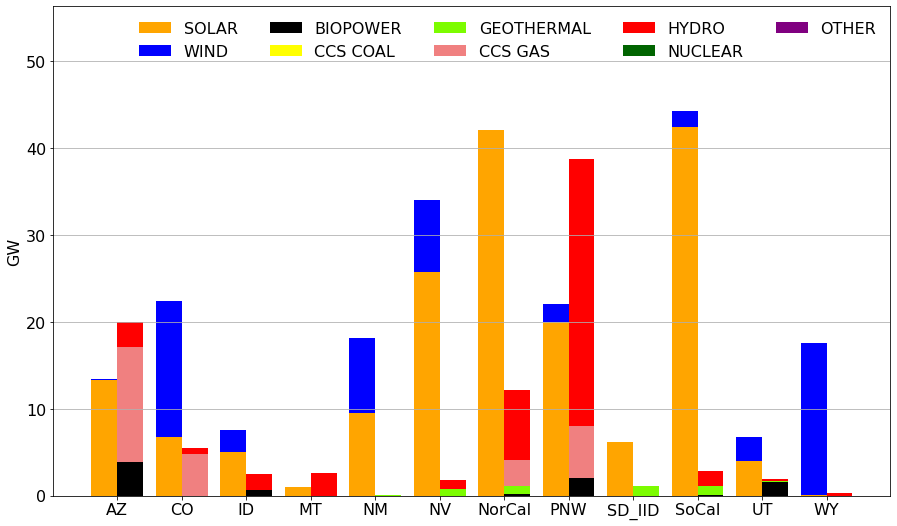

In [16]:
ind = np.arange(len(aggregated_cap_3.index))
bar_width = 0.4

fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2))

ax.bar(ind, aggregated_cap_3.SOLAR, width = bar_width, label = 'SOLAR', color = 'orange')
ax.bar(ind, aggregated_cap_3.WIND, width = bar_width, label = 'WIND', color = 'blue', 
       bottom = aggregated_cap_3.SOLAR)

ax.bar(ind + bar_width, aggregated_cap_3.BIOPOWER, width = bar_width, label = 'BIOPOWER', color = 'black')
ax.bar(ind + bar_width, aggregated_cap_3.CCS_COAL, width = bar_width, label = 'CCS COAL', color = 'yellow', 
       bottom = aggregated_cap_3.BIOPOWER)
ax.bar(ind + bar_width, aggregated_cap_3.GEOTHERMAL, width = bar_width, label = 'GEOTHERMAL', 
       color = 'lawngreen', bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL)
ax.bar(ind + bar_width, aggregated_cap_3.CCS_GAS, width = bar_width, label = 'CCS GAS', 
       color = 'lightcoral', bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + 
       aggregated_cap_3.GEOTHERMAL)
ax.bar(ind + bar_width, aggregated_cap_3.HYDRO, width = bar_width, label = 'HYDRO', color = 'red', 
       bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + aggregated_cap_3.GEOTHERMAL + 
       aggregated_cap_3.CCS_GAS)
ax.bar(ind + bar_width, aggregated_cap_3.NUCLEAR, width = bar_width, label = 'NUCLEAR', 
       color = 'darkgreen', bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + 
       aggregated_cap_3.GEOTHERMAL + aggregated_cap_3.CCS_GAS + aggregated_cap_3.HYDRO)
ax.bar(ind + bar_width, aggregated_cap_3.OTHER, width = bar_width, label = 'OTHER', color = 'purple', 
       bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + aggregated_cap_3.GEOTHERMAL + 
       aggregated_cap_3.CCS_GAS + aggregated_cap_3.HYDRO + aggregated_cap_3.NUCLEAR)

ax.set_ylabel('GW', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = fs)
ax.tick_params(axis = 'x', labelsize = fs)
ax.yaxis.grid()
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(aggregated_cap_3.index)
ax.legend(fontsize = fs, frameon = False, ncol = 5)

ax.set_ylim(0, max(max(aggregated_cap_3.SOLAR + aggregated_cap_3.WIND), 
                   max(aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + aggregated_cap_3.GEOTHERMAL +
                       aggregated_cap_3.CCS_GAS + aggregated_cap_3.HYDRO + aggregated_cap_3.NUCLEAR + 
                       aggregated_cap_3.OTHER)) + 12)
    
plt.savefig(os.path.join(resultpath, "Regionalization paper", "solar_wind_other_capacities.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Coal, gas, nuclear and other in scenarios

In [30]:
ymax = 0
for x in enumerate(scenario_names):
    if ymax < aggregated_cap_scenario[x[0]][['NONCCS_COAL', 'CCS_COAL', 'NONCCS_GAS', 'CCS_GAS', 'NUCLEAR', 'OTHER']].sum(axis=1).max():
        ymax = aggregated_cap_scenario[x[0]][['NONCCS_COAL', 'CCS_COAL', 'NONCCS_GAS', 'CCS_GAS', 'NUCLEAR', 'OTHER']].sum(axis=1).max()

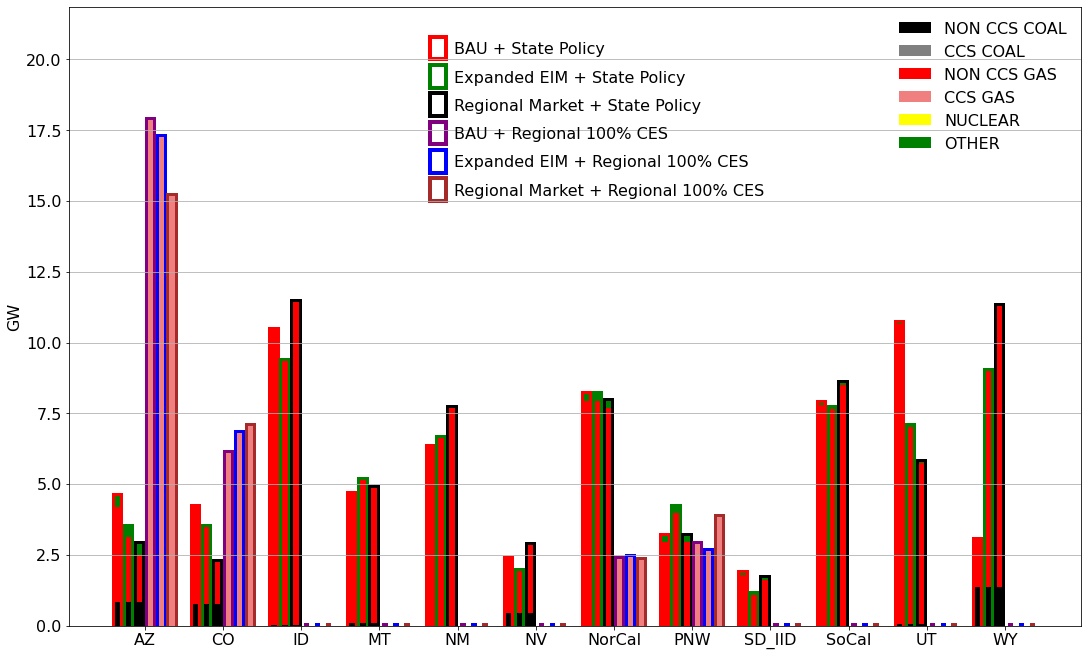

In [31]:
ind = np.arange(len(aggregated_cap))

bar_width = 0.07
bar_space = 0.14
linew = 6
color_scenarios = ['red', 'green', 'black', 'purple', 'blue', 'brown']

fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2), constrained_layout = True)

for x in range(0, len(aggregated_cap_scenario)):
    
    ax.bar(ind + bar_space * x, aggregated_cap_scenario[x].NONCCS_COAL + aggregated_cap_scenario[x].CCS_COAL +
                                aggregated_cap_scenario[x].NONCCS_GAS + aggregated_cap_scenario[x].CCS_GAS +
                                aggregated_cap_scenario[x].NUCLEAR + aggregated_cap_scenario[x].OTHER, 
           width = bar_width, 
           label = '', color = 'white', edgecolor = color_scenarios[x], linewidth = linew)
    
    string_label = 'NON CCS COAL' if x == 0 else ''
    ax.bar(ind + bar_space * x, aggregated_cap_scenario[x].NONCCS_COAL, width = bar_width, 
           label = string_label, color = 'black')
    
    string_label = 'CCS COAL' if x == 0 else ''
    ax.bar(ind + bar_space * x, aggregated_cap_scenario[x].CCS_COAL, width = bar_width, 
           label = string_label, color = 'gray', bottom = aggregated_cap_scenario[x].NONCCS_COAL)
    
    string_label = 'NON CCS GAS' if x == 0 else ''
    ax.bar(ind + bar_space * x, aggregated_cap_scenario[x].NONCCS_GAS, width = bar_width, 
           label = string_label, color = 'red', bottom = aggregated_cap_scenario[x].NONCCS_COAL + 
           aggregated_cap_scenario[x].CCS_COAL)
    
    string_label = 'CCS GAS' if x == 0 else ''
    ax.bar(ind + bar_space * x, aggregated_cap_scenario[x].CCS_GAS, width = bar_width, 
           label = string_label, color = 'lightcoral', bottom = aggregated_cap_scenario[x].NONCCS_COAL + 
           aggregated_cap_scenario[x].CCS_COAL + aggregated_cap_scenario[x].NONCCS_GAS)
    
    string_label = 'NUCLEAR' if x == 0 else ''
    ax.bar(ind + bar_space * x, aggregated_cap_scenario[x].NUCLEAR, width = bar_width, 
           label = string_label, color = 'yellow', bottom = aggregated_cap_scenario[x].NONCCS_COAL + 
           aggregated_cap_scenario[x].CCS_COAL + aggregated_cap_scenario[x].NONCCS_GAS + 
           aggregated_cap_scenario[x].CCS_GAS)
    
    string_label = 'OTHER' if x == 0 else ''
    ax.bar(ind + bar_space * x, aggregated_cap_scenario[x].OTHER, width = bar_width, 
           label = string_label, color = 'green', bottom = aggregated_cap_scenario[x].NONCCS_COAL + 
           aggregated_cap_scenario[x].CCS_COAL + aggregated_cap_scenario[x].NONCCS_GAS + 
           aggregated_cap_scenario[x].CCS_GAS + aggregated_cap_scenario[x].NUCLEAR)
    
ax.set_ylabel('GW', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = fs)
ax.tick_params(axis = 'x', labelsize = fs)
ax.yaxis.grid()
ax.set_xticks(ind + 5 * bar_space / 2)
ax.set_xticklabels(aggregated_cap.index)
ax.legend(fontsize = fs, frameon = False)
ax.set_ylim(0, ymax + 4)

for x in range(0, len(aggregated_cap_scenario)):
    ax.add_patch(Rectangle((4, 20 - 1 * x), 0.2, 0.8, fc = 'none', ec = color_scenarios[x], lw = 4))
    ax.text(4.3, 20.2 - 1 * x, scenario_names[x], fontsize = fs)

plt.savefig(os.path.join(resultfolder, "gascoal_scenarios.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Solar and wind capacities in one scenario

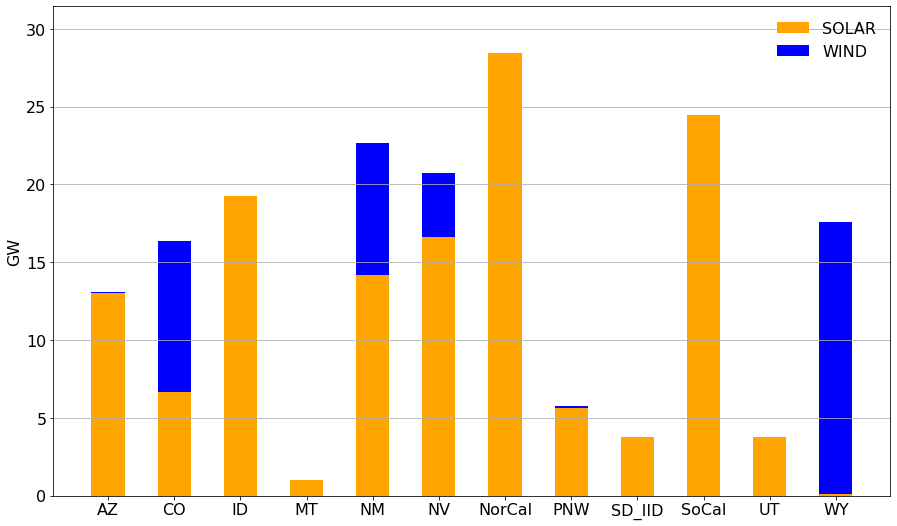

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2))
ax.bar(aggregated_cap.index, aggregated_cap.SOLAR, width = bar_width, label = 'SOLAR', color = 'orange')
ax.bar(aggregated_cap.index, aggregated_cap.WIND, width = bar_width, label = 'WIND', color = 'blue', 
       bottom = aggregated_cap.SOLAR)
ax.set_ylabel('GW', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = fs)
ax.tick_params(axis = 'x', labelsize = fs)
ax.set_ylim(0, max(aggregated_cap.SOLAR + aggregated_cap.WIND) + 3)
ax.yaxis.grid()
ax.legend(fontsize = fs, frameon = False)
plt.savefig(os.path.join(resultfolder, "solar_wind_capacities.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### All other capacities in one scenario

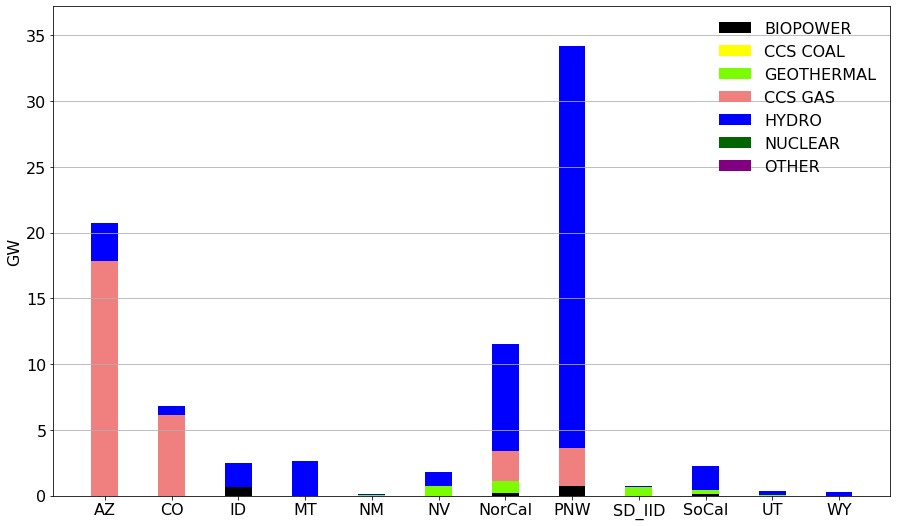

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2))
ax.bar(aggregated_cap_3.index, aggregated_cap_3.BIOPOWER, width = bar_width, label = 'BIOPOWER', color = 'black')
# ax.bar(aggregated_cap_3.index, aggregated_cap_3.NONCCS_COAL, width = bar_width, label = 'NONCCS COAL', 
#        color = 'gray', bottom = aggregated_cap.BIOPOWER)
ax.bar(aggregated_cap_3.index, aggregated_cap_3.CCS_COAL, width = bar_width, label = 'CCS COAL', color = 'yellow', 
       bottom = aggregated_cap_3.BIOPOWER)
ax.bar(aggregated_cap_3.index, aggregated_cap_3.GEOTHERMAL, width = bar_width, label = 'GEOTHERMAL', 
       color = 'lawngreen', bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL)
# ax.bar(aggregated_cap.index, aggregated_cap.NONCCS_GAS, width = bar_width, label = 'NONCCS GAS', 
#        color = 'red', bottom = aggregated_cap.BIOPOWER + aggregated_cap.NONCCS_COAL + aggregated_cap.CCS_COAL + 
#           aggregated_cap.GEOTHERMAL)
ax.bar(aggregated_cap_3.index, aggregated_cap_3.CCS_GAS, width = bar_width, label = 'CCS GAS', 
       color = 'lightcoral', bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + 
       aggregated_cap_3.GEOTHERMAL)
ax.bar(aggregated_cap_3.index, aggregated_cap_3.HYDRO, width = bar_width, label = 'HYDRO', color = 'blue', 
       bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + aggregated_cap_3.GEOTHERMAL + 
       aggregated_cap_3.CCS_GAS)
ax.bar(aggregated_cap_3.index, aggregated_cap_3.NUCLEAR, width = bar_width, label = 'NUCLEAR', 
       color = 'darkgreen', bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + 
       aggregated_cap_3.GEOTHERMAL + aggregated_cap_3.CCS_GAS + aggregated_cap_3.HYDRO)
ax.bar(aggregated_cap_3.index, aggregated_cap_3.OTHER, width = bar_width, label = 'OTHER', color = 'purple', 
       bottom = aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + aggregated_cap_3.GEOTHERMAL + 
       aggregated_cap_3.CCS_GAS + aggregated_cap_3.HYDRO + aggregated_cap_3.NUCLEAR)

ax.set_ylabel('GW', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = fs)
ax.tick_params(axis = 'x', labelsize = fs)
ax.set_ylim(0, max(aggregated_cap_3.BIOPOWER + aggregated_cap_3.CCS_COAL + aggregated_cap_3.GEOTHERMAL + 
                   aggregated_cap_3.CCS_GAS + aggregated_cap_3.HYDRO + aggregated_cap_3.NUCLEAR + aggregated_cap_3.OTHER) + 3)
ax.yaxis.grid()
ax.legend(fontsize = fs, frameon = False)
plt.savefig(os.path.join(resultfolder_3, "all_other_capacities.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Transmission path in 100% CES + BAU scenario

In [24]:
# proposed_network = pronetwork[['transmission_path_name', 'Line_Max_Flow_MW']]
# proposed_network = proposed_network.groupby('transmission_path_name').sum()
# proposed_network.reset_index(inplace = True)
# proposed_network = proposed_network.rename(columns = {'index':'transmission_path_name'})
# proposed_network = proposed_network.rename(columns = {'Line_Max_Flow_MW':'Proposed'})

In [25]:
# expro = pd.merge(existing_network, proposed_network, how = 'outer', on = 'transmission_path_name')
expro = existing_network.rename(columns = {'transmission_path_name':'Path'})
expro = expro.set_index('Path')
expro = expro / 1000
expro = pd.merge(expro, totalline_cap_3, how = 'outer', on = 'Path')
expro = expro.fillna(0)
expro['Expansion'] = expro.OptValues - expro.Existing
del expro['OptValues']

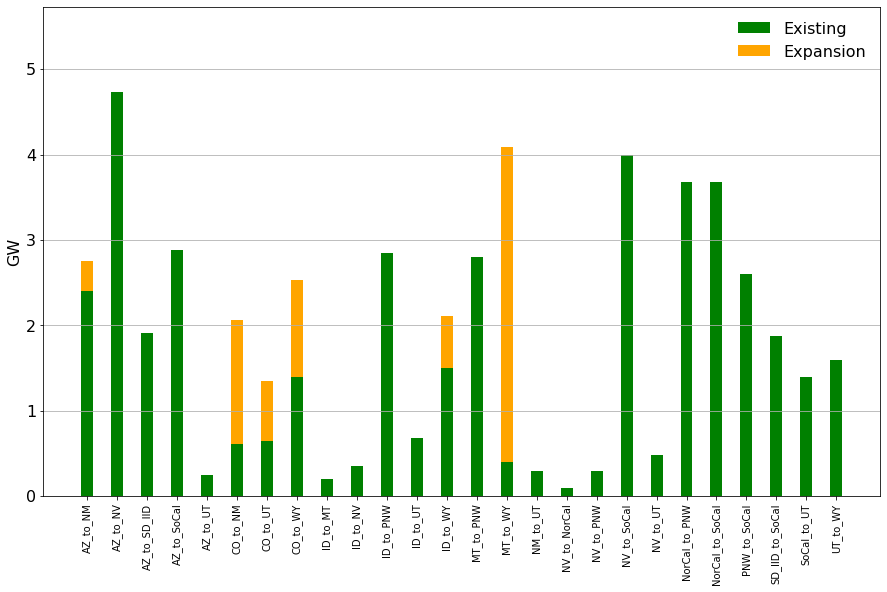

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2))
ax.bar(expro.index, expro.Existing, width = bar_width, label = 'Existing', color = 'green')
# ax.bar(expro.index, expro.Proposed, width = bar_width, label = 'Proposed', color = 'orange', 
#        bottom = expro.Existing)
ax.bar(expro.index, expro.Expansion, width = bar_width, label = 'Expansion', color = 'orange', 
       bottom = expro.Existing)
ax.set_ylabel('GW', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = fs)
ax.tick_params(axis = 'x', labelsize = 10, rotation = 90)
ax.set_ylim(0, max(expro.Existing + expro.Expansion) + 1)
ax.yaxis.grid()
ax.legend(fontsize = fs, frameon = False)
plt.savefig(os.path.join(resultpath, "Regionalization paper", "baseline_transmission.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Flow diagram in one scenario

In [ ]:
trial_df = gpd.GeoDataFrame(out, geometry = 'geometry')
# If you want to convert a data frame to geodataframe, use the code above.
# The following code is a bit more complicated than necessary. Look at regionalization notebook for a 
# simpler version of region aggregation

In [61]:
def get_key(zone):
    for key, value in regions.items():
        for val in value:
            if val == zone:
                return key

In [62]:
peak_week_flow = flow.iloc[: , -168:].sum(axis = 1)
peak_week_flow = pd.DataFrame(peak_week_flow)
peak_week_flow.columns = ['Power']

In [9]:
regions = {
    "Northwest": ["PNW", "ID", "MT"],
    "Rocky Mountains": ["WY", "CO"],
    "Basin": ["NV", "UT"],
    "Southwest": ["AZ", "NM"],
    "California": ["NorCal", "SoCal", "SD_IID"]
}

In [64]:
all_paths = []
for index, value in enumerate(regions.keys()):
    for x in range(index + 1,len(regions.keys())):
        all_paths.append(value + "-" + list(regions)[x])
        
power_data = pd.DataFrame()
power_data['Path'] = all_paths
power_data['Power'] = list(itertools.repeat(0, len(all_paths)))

In [65]:
for line_number, (index, row) in enumerate(peak_week_flow.iterrows()):
    
    if (row.name.split('_')[0] != 'SD') & (row.name.split('_')[2] != 'SD'):
        szone = row.name.split('_')[0]
        ezone = row.name.split('_')[2]
    
    if row.name.split('_')[0] == 'SD':
        szone = str(row.name.split('_')[0] + '_' + row.name.split('_')[1])
        ezone = row.name.split('_')[3]
    elif row.name.split('_')[2] == 'SD':
        szone = row.name.split('_')[0]
        ezone = str(row.name.split('_')[2] + '_' + row.name.split('_')[3])
    
    scode = regiondf[regiondf.Region == szone].Code.tolist()[0]
    ecode = regiondf[regiondf.Region == ezone].Code.tolist()[0]
    
    saggzone = get_key(szone)
    eaggzone = get_key(ezone)
    
    if saggzone != eaggzone:
        
        multiplier = linenum.iloc[line_number][scode]
        
        for index2, row2 in power_data.iterrows():
            
            candidate_sagg = row2["Path"].split("-")[0]
            candidate_eagg = row2["Path"].split("-")[1]
        
            if (saggzone == candidate_sagg) |  (saggzone == candidate_eagg):
                if (eaggzone == candidate_sagg) |  (eaggzone == candidate_eagg):
                    
                    power_data_index = index2
                    
                    if saggzone == candidate_sagg:
                        multiplier2 = 1
                    else:
                        multiplier2 = -1
        
        power_data.at[power_data_index, "Power"] = power_data.at[power_data_index, "Power"] + multiplier2 * row.Power * multiplier    

In [66]:
power_data = power_data.set_index('Path')
power_data = power_data.loc[(power_data != 0).any(axis = 1)]

In [10]:
region_shapes = {
    "Northwest": unary_union(wecczone_shapes[wecczone_shapes.index.isin(regions['Northwest'])]['geometry']),
    "Rocky Mountains": unary_union(wecczone_shapes[wecczone_shapes.index.isin(regions['Rocky Mountains'])]['geometry']),
    "Basin": unary_union(wecczone_shapes[wecczone_shapes.index.isin(regions['Basin'])]['geometry']),
    "Southwest": unary_union(wecczone_shapes[wecczone_shapes.index.isin(regions['Southwest'])]['geometry']),
    "California": unary_union(wecczone_shapes[wecczone_shapes.index.isin(regions['California'])]['geometry'])
}

out = pd.DataFrame(pd.Series(region_shapes))
out.columns = ['geometry']

/Users/Kucuksayacigil/opt/anaconda3/envs/figcreation/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/Users/Kucuksayacigil/opt/anaconda3/envs/figcreation/lib/python3.9/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


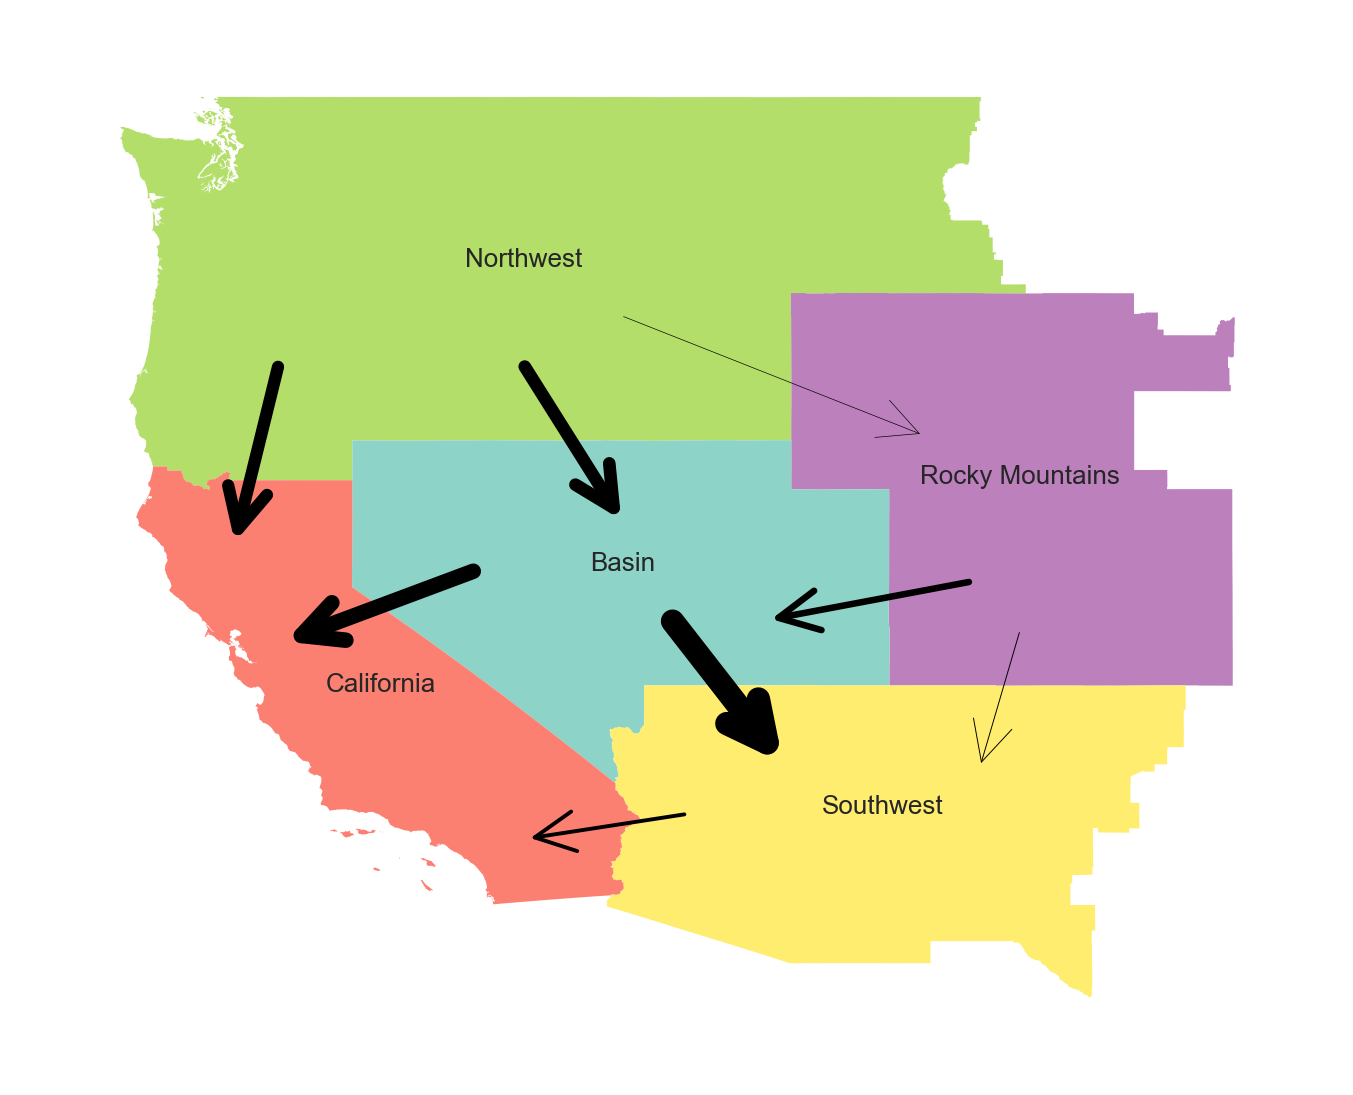

In [68]:
fig = geoplot.choropleth(gpd.GeoSeries(out['geometry']), hue = out.index, figsize = (24, 24),
                         edgecolor = 'none', linewidth = 2, cmap = 'Set3')

for xy, label in zip(out.geometry, out.index):
    fig.annotate(label, xy = xy.centroid.coords[0], fontsize = 26, ha = 'center',
                 bbox = {'facecolor': 'white', 'alpha': 0, 'pad': 2, 'edgecolor': 'none'})
    
for label, width in  zip(power_data.index, power_data.Power / 50):
    
    start, end = label.split('-')
    
    if width > 0:
        arrow_point = end
        text_point = start
    else:
        arrow_point = start
        text_point = end
    
    width = abs(width)
    
    if (arrow_point == 'Northwest') & (text_point == 'Rocky Mountains'):
        shrink_arrow, shrink_text = [2, -1], [-2, 1]
    elif (arrow_point == 'Rocky Mountains') & (text_point == 'Northwest'):
        shrink_arrow, shrink_text = [-2, 1], [2, -1]
        
    if (arrow_point == 'Northwest') & (text_point == 'Basin'):
        shrink_arrow, shrink_text = [0, -2], [0, 1]
    elif (arrow_point == 'Basin') & (text_point == 'Northwest'):
        shrink_arrow, shrink_text = [0, 1], [0, -2]
        
    if (arrow_point == 'Northwest') & (text_point == 'California'):
        shrink_arrow, shrink_text = [-7, -2], [-3, 3]
    elif (arrow_point == 'California') & (text_point == 'Northwest'):
        shrink_arrow, shrink_text = [-3, 3], [-5, -2]
        
    if (arrow_point == 'Rocky Mountains') & (text_point == 'Basin'):
        shrink_arrow, shrink_text = [-1, -2], [3, -1]
    elif (arrow_point == 'Basin') & (text_point == 'Rocky Mountains'):
        shrink_arrow, shrink_text = [3, -1], [-1, -2]
        
    if (arrow_point == 'Rocky Mountains') & (text_point == 'Southwest'):
        shrink_arrow, shrink_text = [0, -3], [2, 1]
    elif (arrow_point == 'Southwest') & (text_point == 'Rocky Mountains'):
        shrink_arrow, shrink_text = [2, 1], [0, -3]
        
    if (arrow_point == 'Basin') & (text_point == 'Southwest'):
        shrink_arrow, shrink_text = [1, -1], [-2, 1]
    elif (arrow_point == 'Southwest') & (text_point == 'Basin'):
        shrink_arrow, shrink_text = [-2, 1], [1, -1]
        
    if (arrow_point == 'Basin') & (text_point == 'California'):
        shrink_arrow, shrink_text = [-3, 0], [-2, 1]
    elif (arrow_point == 'California') & (text_point == 'Basin'):
        shrink_arrow, shrink_text = [-2, 1], [-3, 0]
        
    if (arrow_point == 'Southwest') & (text_point == 'California'):
        shrink_arrow, shrink_text = [-4, 0], [3, -3]
    elif (arrow_point == 'California') & (text_point == 'Southwest'):
        shrink_arrow, shrink_text = [3, -3], [-4, 0]
    
    fig.annotate("", 
                 xy = np.add(list(out.loc[arrow_point]['geometry'].centroid.coords[0]), shrink_arrow), 
                 xytext = np.add(list(out.loc[text_point]['geometry'].centroid.coords[0]), shrink_text),
                 arrowprops = dict(arrowstyle = "->", lw = width, color = 'black', mutation_scale = 100)
                )
    
fig = fig.get_figure()
fig.savefig(os.path.join(resultfolder, "flowdiagram.pdf"), 
            dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

In [ ]:
if (start == 'NM') & (end == 'SoCal'):
    shrink_arrow, shrink_text = [-1, 0], [0, 0]
elif (start == 'NV') & (end == 'UT'):
    shrink_arrow, shrink_text = [1, -1], [-1, 0]
elif (start == 'UT') & (end == 'WY'):
    utwy_counter = utwy_counter + 1
    if utwy_counter == 1:
        shrink_arrow, shrink_text = [1, 1], [-1, -1]
    else:
        shrink_arrow, shrink_text = [1, 0.8], [-1, -1.2]
elif (start == 'ID') & (end == 'WY'):
    shrink_arrow, shrink_text = [1, -1], [-1, 1]
elif (start == 'AZ') & (end == 'NM'):
    aznm_counter = aznm_counter + 1
    if aznm_counter == 1:
        shrink_arrow, shrink_text = [1, -1.5], [-1, -1]
    else:
        shrink_arrow, shrink_text = [1, -1.7], [-1, -1.2]
elif (start == 'AZ') & (end == 'SD_IID'):
    azsdiid_counter = azsdiid_counter + 1
    if azsdiid_counter == 1:
        shrink_arrow, shrink_text = [-1, -1], [0, 0]
    else:
        shrink_arrow, shrink_text = [-1, -1.2], [0, -0.2]
elif (start == 'ID') & (end == 'NV'):
    shrink_arrow, shrink_text = [0.5, -1], [0, 0]
elif (start == 'NV') & (end == 'WY'):
    shrink_arrow, shrink_text = [1, 0], [-1, 0]
elif (start == 'ID') & (end == 'PNW'):
    shrink_arrow, shrink_text = [-1, 1], [0, 0]
elif (start == 'AZ') & (end == 'SoCal'):
    shrink_arrow, shrink_text = [-1, 0], [0, -0.3]
elif (start == 'CO') & (end == 'WY'):
    shrink_arrow, shrink_text = [0, 1], [0, -1]
elif (start == 'NV') & (end == 'NorCal'):
    shrink_arrow, shrink_text = [-1, 0], [0, 0]
elif (start == 'MT') & (end == 'NV'):
    shrink_arrow, shrink_text = [-1, 0], [0, 1]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2))

string_label = 'Existing' if sum(expro.Existing) != 0 else ''
ax.bar(expro.index, expro.Existing, width = bar_width, label = string_label, color = 'green')

string_label = 'Proposed' if sum(expro.Proposed) != 0 else ''
ax.bar(expro.index, expro.Proposed, width = bar_width, label = 'Proposed', color = 'orange', 
       bottom = expro.Existing)

string_label = '230 kV AC to 345 kV AC' if sum(expro['230 kV AC to 345 kV AC']) != 0 else ''
ax.bar(expro.index, expro['230 kV AC to 345 kV AC'], width = bar_width, label = string_label, 
       color = 'black', bottom = expro.Existing + expro.Proposed)

string_label = '230 kV AC to 500 kV AC' if sum(expro['230 kV AC to 500 kV AC']) != 0 else ''
ax.bar(expro.index, expro['230 kV AC to 500 kV AC'], width = bar_width, label = string_label, 
       color = 'purple', bottom = expro.Existing + expro.Proposed + 
       expro['230 kV AC to 345 kV AC'])

string_label = '230 kV AC to 500 kV DC' if sum(expro['230 kV AC to 500 kV DC']) != 0 else ''
ax.bar(expro.index, expro['230 kV AC to 500 kV DC'], width = bar_width, label = string_label, 
       color = 'yellow', bottom = expro.Existing + expro.Proposed + 
       expro['230 kV AC to 345 kV AC'] + expro['230 kV AC to 500 kV AC'])

string_label = '345 kV AC to 500 kV AC' if sum(expro['345 kV AC to 500 kV AC']) != 0 else ''
ax.bar(expro.index, expro['345 kV AC to 500 kV AC'], width = bar_width, label = string_label, 
       color = 'red', bottom = expro.Existing + expro.Proposed + 
       expro['230 kV AC to 345 kV AC'] + expro['230 kV AC to 500 kV AC'] + 
       expro['230 kV AC to 500 kV DC'])

string_label = '345 kV AC to 500 kV DC' if sum(expro['345 kV AC to 500 kV DC']) != 0 else ''
ax.bar(expro.index, expro['345 kV AC to 500 kV DC'], width = bar_width, label = string_label, 
       bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
       expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
       expro['345 kV AC to 500 kV AC'])

string_label = '500 kV AC to 500 kV DC' if sum(expro['500 kV AC to 500 kV DC']) != 0 else ''
ax.bar(expro.index, expro['500 kV AC to 500 kV DC'], width = bar_width, label = string_label, 
       bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
       expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
       expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'])

string_label = 'New AC Line' if sum(expro['New AC Line']) != 0 else ''
ax.bar(expro.index, expro['New AC Line'], width = bar_width, label = string_label, 
       bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
       expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
       expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'] + 
       expro['500 kV AC to 500 kV DC'])

string_label = 'New DC Line' if sum(expro['New DC Line']) != 0 else ''
ax.bar(expro.index, expro['New DC Line'], width = bar_width, label = string_label, 
       bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
       expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
       expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'] + 
       expro['500 kV AC to 500 kV DC'] + expro['New AC Line'])

ax.set_ylabel('GW', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = fs)
ax.tick_params(axis = 'x', labelsize = 10, rotation = 90)
ax.set_ylim(0, max(expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
                   expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
                   expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'] + 
                   expro['500 kV AC to 500 kV DC'] + expro['New AC Line'] + 
                   expro['New DC Line']) + 3)
ax.yaxis.grid()
ax.legend(fontsize = 12, frameon = False, ncol = 2)
plt.savefig(os.path.join(rf_no_nonlinear, "transmission_nonlinear.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

In [ ]:
import json
from shapely.geometry import Polygon

g = json.loads(deneme[deneme.index == 'CALN'].to_json())
coords = np.array(g['features'][0]['geometry']['coordinates']) # getting coordinates as list
caln_df = pd.DataFrame([["Polygon", str(coords[50])]], columns = ["type", "geometry"]) # creating a data frame with one of the coordinates
caln_poly = Polygon(eval(caln_df.geometry.iloc[0])[0])
caln_df = gpd.GeoDataFrame(gpd.GeoSeries(caln_poly), columns = ['geometry']) # converting data frame to geodataframe

/Users/Kucuksayacigil/opt/anaconda3/envs/figcreation/lib/python3.9/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


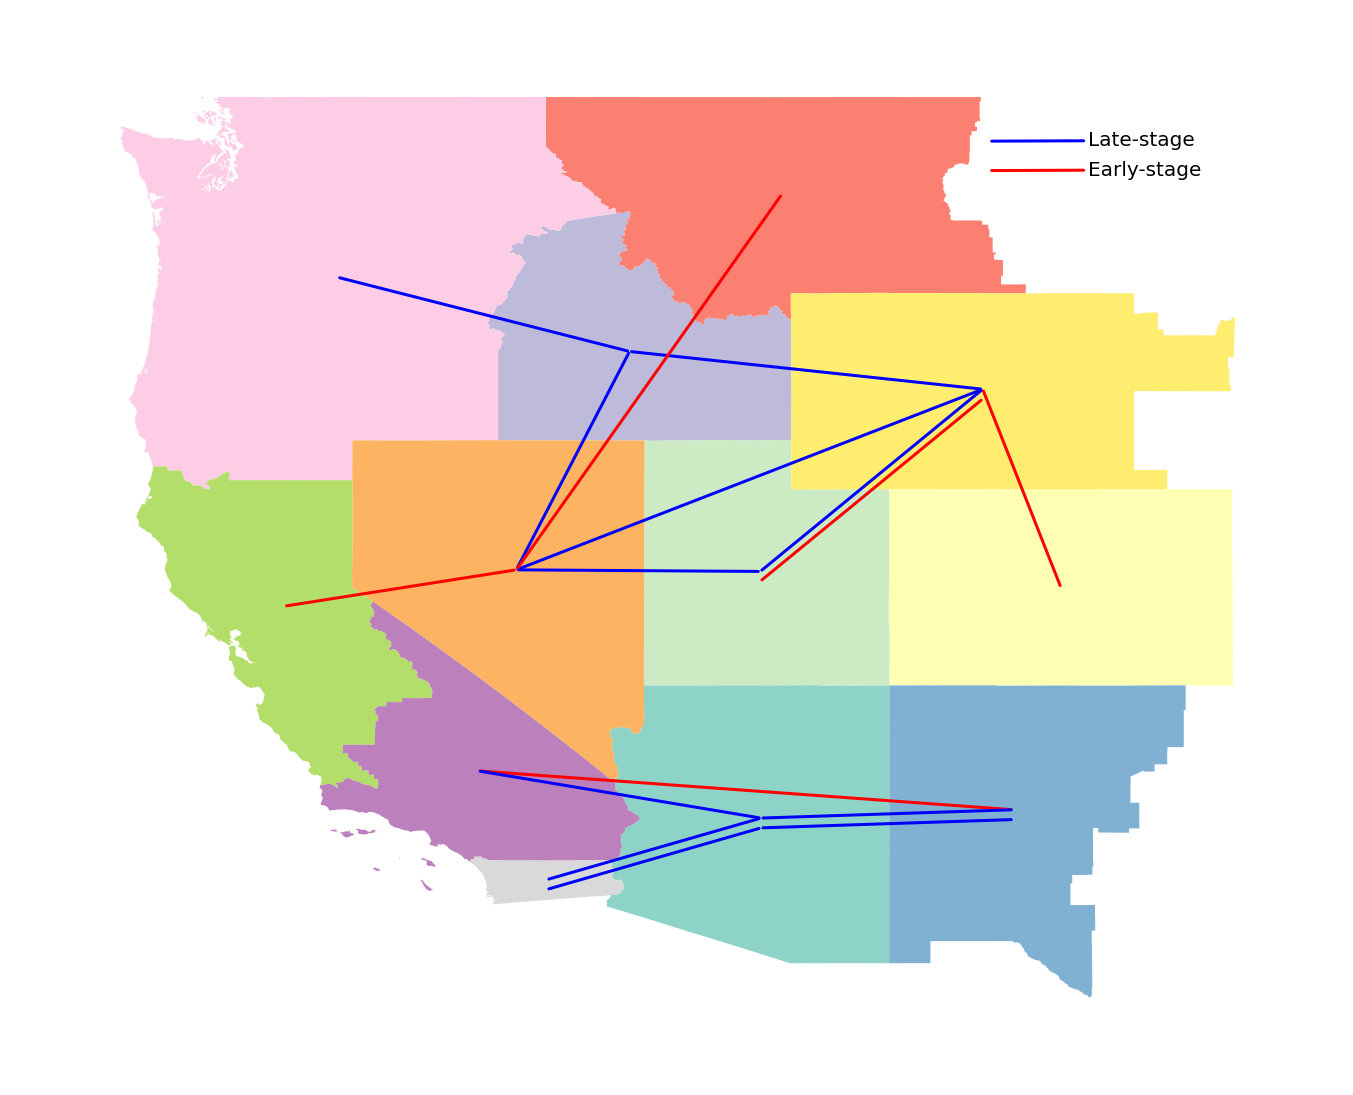

In [26]:
# Set3, tab20, Paired, twilight_shifted, twilight
fig = geoplot.choropleth(gpd.GeoSeries(wecczone_shapes['geometry']), hue = wecczone_shapes.index, 
                         figsize = (24, 24), edgecolor = 'none', linewidth = 2, cmap = 'Set3')

fig.annotate("Late-stage", 
             xy = [-107, 48.1], 
             xytext = [-105, 48], 
             arrowprops = dict(arrowstyle = "-", lw = 3, color = "blue"),
             fontsize = 20)

fig.annotate("Early-stage", 
             xy = [-107, 47.5], 
             xytext = [-105, 47.4], 
             arrowprops = dict(arrowstyle = "-", lw = 3, color = "red"),
             fontsize = 20)

aznm_counter = 0
azsdiid_counter = 0
utwy_counter = 0
for index, row in proposed_status.iterrows():
    
    shrink_arrow, shrink_text = [0, 0], [0, 0]
    
    if (index.split('_')[0] != 'SD') & (index.split('_')[2] != 'SD'):
        start = index.split('_')[0]
        end = index.split('_')[2]
    
    if index.split('_')[0] == 'SD':
        start = str(index.split('_')[0] + '_' + index.split('_')[1])
        end = index.split('_')[3]
    elif index.split('_')[2] == 'SD':
        start = index.split('_')[0]
        end = str(index.split('_')[2] + '_' + index.split('_')[3])


    if (start == 'UT') & (end == 'WY'):
        utwy_counter = utwy_counter + 1
        if utwy_counter == 2:
            shrink_arrow, shrink_text = [0, -0.2], [0, -0.2]
    elif (start == 'AZ') & (end == 'NM'):
        aznm_counter = aznm_counter + 1
        if aznm_counter == 2:
            shrink_arrow, shrink_text = [0, -0.2], [0, -0.2]
    elif (start == 'AZ') & (end == 'SD_IID'):
        azsdiid_counter = azsdiid_counter + 1
        if azsdiid_counter == 2:
            shrink_arrow, shrink_text = [0, -0.2], [0, -0.2]
    
    if (row.Status == 'Very_likely') | (row.Status == 'Likely'):
        linec = 'blue'
    else:
        linec = 'red'
        
    fig.annotate("", 
                 xy = np.add(list(wecczone_shapes[wecczone_shapes.index == start]['geometry'].iloc[0].centroid.coords[0]), shrink_arrow), 
                 xytext = np.add(list(wecczone_shapes[wecczone_shapes.index == end]['geometry'].iloc[0].centroid.coords[0]), shrink_text),
                 arrowprops = dict(arrowstyle = "-", lw = 3, color = linec, mutation_scale = 100)
                )

fig = fig.get_figure()
fig.savefig(os.path.join(rf_no_nonlinear, "proposed_lines.pdf"), 
            dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

/Users/Kucuksayacigil/opt/anaconda3/envs/figcreation/lib/python3.9/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


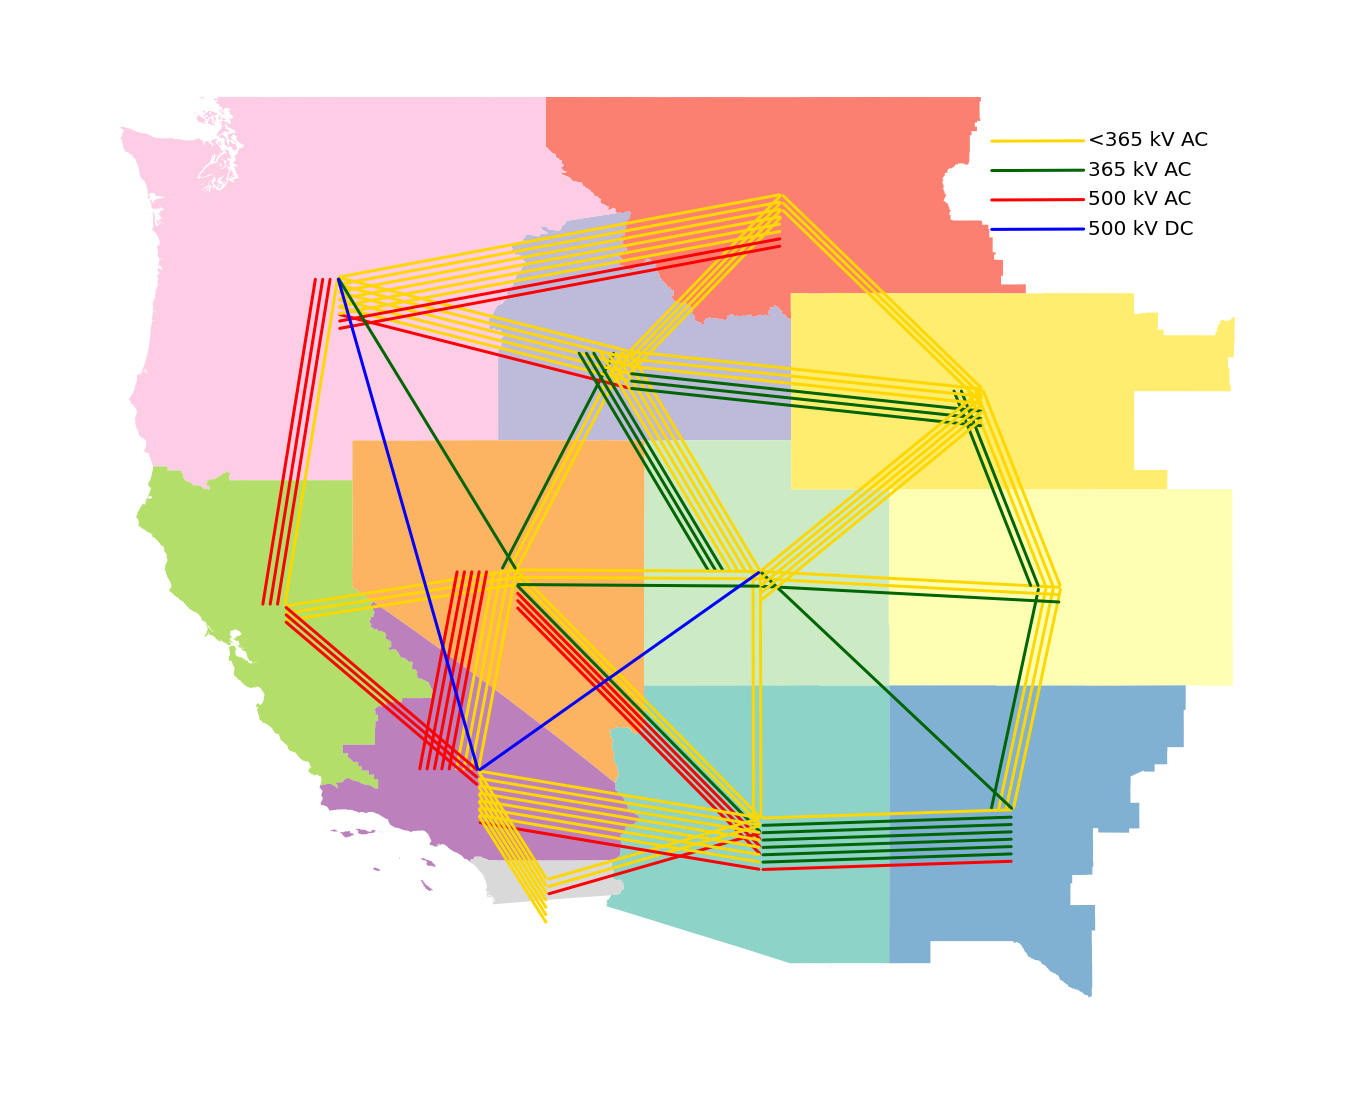

In [31]:
fig = geoplot.choropleth(gpd.GeoSeries(wecczone_shapes['geometry']), hue = wecczone_shapes.index, 
                         figsize = (24, 24), edgecolor = 'none', linewidth = 2, cmap = 'Set3')

for colnum, col in enumerate(voltages_lines.columns):
    fig.annotate(line_names[colnum], 
                 xy = [-107, 48.1 - (0.6 * colnum)], 
                 xytext = [-105, 48 - (0.6 * colnum)], 
                 arrowprops = dict(arrowstyle = "-", lw = 3, color = line_colors[colnum]),
                 fontsize = 20)

for index, row in voltages_lines.iterrows():
    
    line_counter = 0
    shrink_arrow, shrink_text = [0, 0], [0, 0]
    
    if (index.split('_')[0] != 'SD') & (index.split('_')[2] != 'SD'):
        start = index.split('_')[0]
        end = index.split('_')[2]
    
    if index.split('_')[0] == 'SD':
        start = str(index.split('_')[0] + '_' + index.split('_')[1])
        end = index.split('_')[3]
    elif index.split('_')[2] == 'SD':
        start = index.split('_')[0]
        end = str(index.split('_')[2] + '_' + index.split('_')[3])
    
    if ((start == 'NorCal') & (end == 'PNW')) | ((start == 'CO') & (end == 'WY')) | ((start == 'AZ') & (end == 'UT')) |((start == 'CO') & (end == 'NM')) | ((start == 'ID') & (end == 'NV')) | ((start == 'NV') & (end == 'SoCal')) | ((start == 'ID') & (end == 'UT')):
        shift_longitude, shift_latitude = -0.15, 0
    else:
        shift_longitude, shift_latitude = 0, -0.15
    
    for colnum, col in enumerate(voltages_lines.columns):
        for num in range(0, row[col]):
            fig.annotate("", 
                         xy = np.add(list(wecczone_shapes[wecczone_shapes.index == start]['geometry'].iloc[0].centroid.coords[0]), shrink_arrow), 
                         xytext = np.add(list(wecczone_shapes[wecczone_shapes.index == end]['geometry'].iloc[0].centroid.coords[0]), shrink_text),
                         arrowprops = dict(arrowstyle = "-", lw = 3, color = line_colors[colnum], mutation_scale = 100)
                        )
            line_counter = line_counter + 1
            shrink_arrow = [line_counter * shift_longitude, line_counter * shift_latitude]
            shrink_text = [line_counter * shift_longitude, line_counter * shift_latitude]

fig = fig.get_figure()
fig.savefig(os.path.join(rf_no_nonlinear, "existing_lines.pdf"), 
            dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Aggregated transmission capacities in scenarios

In [ ]:
upgrade_cap = []
for x in enumerate(scenario_names):
    upgrade_cap.append(sum(upgrade_scenario[x[0]].OptVal))
    
newline_cap = []
for x in enumerate(scenario_names):
    newline_cap.append(sum(newlineres_scenario[x[0]].vCAPNEWAC) + sum(newlineres_scenario[x[0]].vCAPNEWDC))

### MWmile of transmission lines in scenarios

In [ ]:
upgrade_gwmile = []
for x in enumerate(scenario_names):
    upgrade_withmile = pd.merge(upgrade_scenario[x[0]], existing_mile, how = 'inner', on = 'Path')
    upgrade_gwmile.append(sum(upgrade_withmile.OptVal * upgrade_withmile.distance_mile))
    
newline_gwmile = []
for x in enumerate(scenario_names):
    newline_withmile = pd.merge(newlineres_scenario[x[0]], existing_mile, how = 'inner', on = 'Path')
    newline_gwmile.append(sum((newline_withmile.vCAPNEWAC + newline_withmile.vCAPNEWDC) * newline_withmile.distance_mile)) 

### Paths in scenarios

In [ ]:
total_expansion = pd.DataFrame()
for x in enumerate(scenario_names):
    expansion_df = pd.merge(newlineres_scenario[x[0]], upgrade_scenario[x[0]].groupby('Path').sum(), 
                            how = 'outer', on = 'Path').fillna(0)
    path_names = expansion_df.Path
    expansion_df = expansion_df['vCAPNEWAC'] + expansion_df['vCAPNEWDC'] + expansion_df['OptVal']
    expansion_df = pd.DataFrame(expansion_df)
    expansion_df.columns = [scenario_names[x[0]]]
    expansion_df.index = path_names
    
    if x[0] == 0: total_expansion = expansion_df.copy()
    if x[0] != 0:
        total_expansion = pd.merge(total_expansion, expansion_df, how = 'outer', on = 'Path')
        
total_expansion = total_expansion.loc[(total_expansion != 0).any(axis = 1)]

In [ ]:
# upgrade_1 = pd.read_csv(os.path.join(resultfolder_1, "vCAPUPDATE_results.csv"))
# upgrade_2 = pd.read_csv(os.path.join(resultfolder_2, "vCAPUPDATE_results.csv"))
# upgrade_3 = pd.read_csv(os.path.join(resultfolder_3, "vCAPUPDATE_results.csv"))
# upgrade_4 = pd.read_csv(os.path.join(resultfolder_4, "vCAPUPDATE_results.csv"))
# upgrade_5 = pd.read_csv(os.path.join(resultfolder_5, "vCAPUPDATE_results.csv"))
# upgrade_1.OptVal = upgrade_1.OptVal / 1000
# upgrade_2.OptVal = upgrade_2.OptVal / 1000
# upgrade_3.OptVal = upgrade_3.OptVal / 1000
# upgrade_4.OptVal = upgrade_4.OptVal / 1000
# upgrade_5.OptVal = upgrade_5.OptVal / 1000

# upgrade_scenario = [upgrade, upgrade_1, upgrade_2, upgrade_3, upgrade_4, upgrade_5]

# newlineres_1 = pd.read_csv(os.path.join(resultfolder_1, "newline_investment_results.csv"))
# newlineres_2 = pd.read_csv(os.path.join(resultfolder_2, "newline_investment_results.csv"))
# newlineres_3 = pd.read_csv(os.path.join(resultfolder_3, "newline_investment_results.csv"))
# newlineres_4 = pd.read_csv(os.path.join(resultfolder_4, "newline_investment_results.csv"))
# newlineres_5 = pd.read_csv(os.path.join(resultfolder_5, "newline_investment_results.csv"))
# newlineres_1[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] = newlineres_1[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] / 1000
# newlineres_2[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] = newlineres_2[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] / 1000
# newlineres_3[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] = newlineres_3[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] / 1000
# newlineres_4[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] = newlineres_4[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] / 1000
# newlineres_5[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] = newlineres_5[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] / 1000

# newlineres_scenario = [newlineres, newlineres_1, newlineres_2, newlineres_3, newlineres_4, newlineres_5]